In [1]:
print("hello")

hello


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sympy as sym
from collections import Counter
from patsy import dmatrices
from scipy import linalg, stats
from scipy.integrate import quad
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW, ttest_ind
from sympy import *
from sympy. stats import *
from sympy.plotting import plot3d

In [3]:
#8.1
X = DiscreteUniform('X', range(1, 7))
density(X)(2)

1/6

In [4]:
rv = stats.randint(1, 7)
rv.pmf(2)

0.16666666666666666

In [5]:
P(Eq(X, 2))


1/6

(array([188.,   0., 178.,   0., 163.,   0., 160.,   0., 136., 175.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

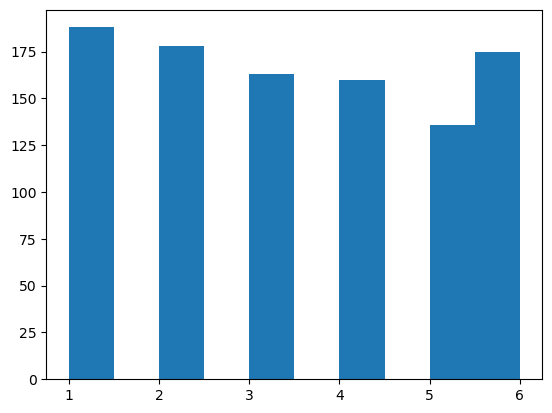

In [6]:
#8.2
data = list(sample_iter(X, numsamples=1000))
plt.hist(data)

(array([151.,   0., 162.,   0., 157.,   0., 185.,   0., 195., 150.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

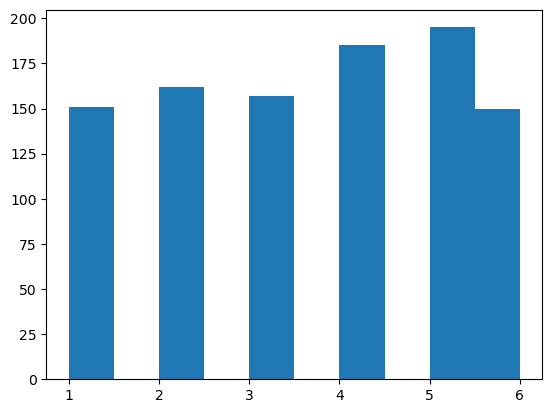

In [7]:
data =rv.rvs(size=1000)
plt.hist(data)

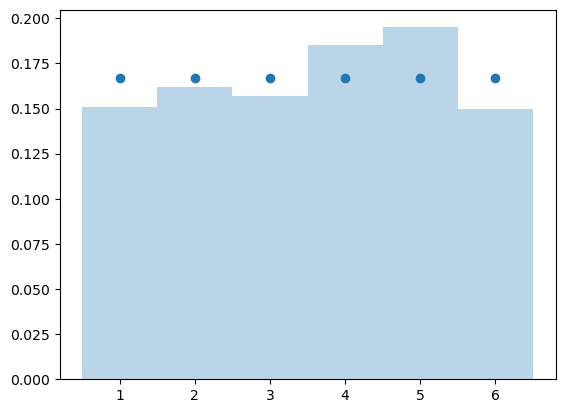

In [8]:
x = range(1, 7); y = [density(X)(x) for x in x]
_, ax = plt. subplots() #結果のうち，使わない部分を_とする。
ax.hist(data, bins=np.arange(0.5, 7, 1), density=True, alpha=0.3)
ax.scatter(x, y);

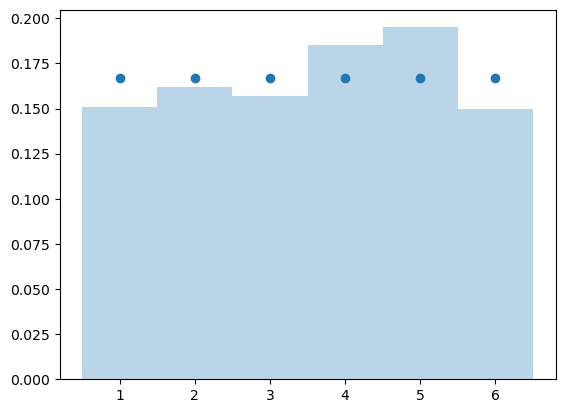

In [9]:
x = range(1, 7) ; y = rv.pmf (x)
_, ax = plt.subplots() #結果のうち，使わない部分を_とする。
ax.hist(data, bins=np.arange(0.5, 7, 1), density=True, alpha=0.3)
ax.scatter(x, y);

In [10]:
X = Bernoulli('X', p=sym. S(3) / 10)
data = list(sample_iter(X, numsamples=1000))
np.bincount(data), Counter(data)#二つの方法

(array([702, 298]), Counter({0: 702, 1: 298}))

In [11]:
rv = stats.bernoulli (3 / 10)
data = rv.rvs (1000)
np.bincount (data), Counter(data)#二つの方法

(array([707, 293]), Counter({0: 707, 1: 293}))

二項分布

In [12]:
#8.4
X = Binomial('X', 10, sym.S(3) / 10)
density(X)(3)

66706983/250000000

In [13]:
rv =stats.binom(10, 3/10)
rv.pmf(3)

0.2668279319999998

In [14]:
var('n p x')
X = Binomial('X', n, p)
density(X)(x)

Piecewise((p**x*(1 - p)**(n - x)*binomial(n, x), Contains(x, Integers) & (n >= x) & (x >= 0)), (0, True))

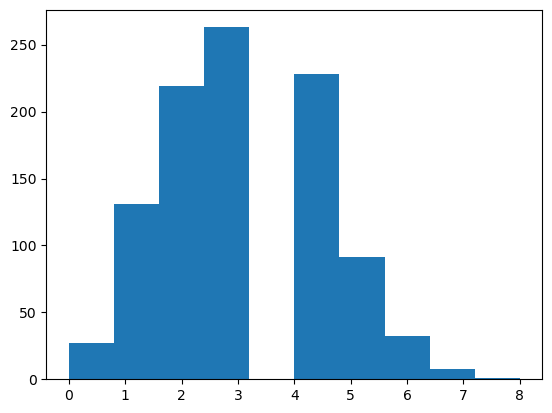

In [15]:
n = 10; p = sym.S (3) / 10; X = Binomial('X', n, p)
data = list(sample_iter(X, numsamples=1000))
plt.hist(data);# 結果は割愛

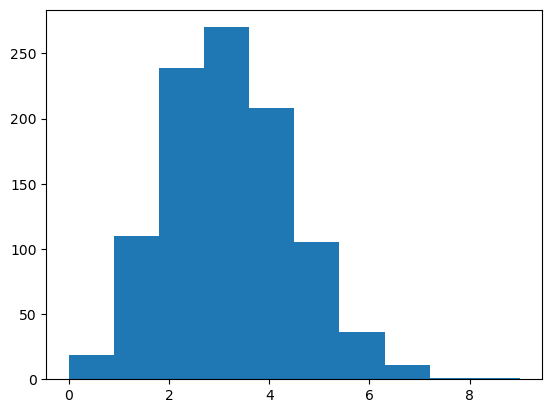

In [16]:
n = 10; p = 3 / 10; rv = stats.binom(n, p)
data = rv.rvs (1000)
plt. hist(data);

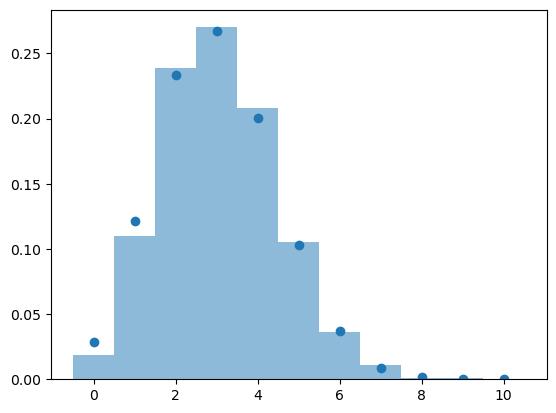

In [17]:
x = range(0, n + 1); y = [density(X)(x) for x in x]
_, ax = plt.subplots()
ax.hist(data, bins=np.arange(-0.5, n + 1, 1), density=True, alpha=0.5)
ax.scatter(x, y);

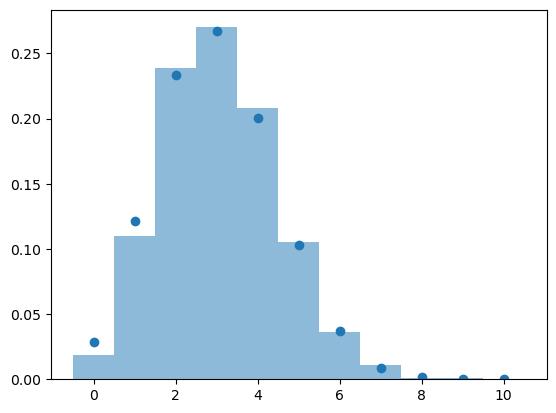

In [18]:
x = range(0, n + 1) ; y = rv.pmf (x)
_, ax = plt.subplots()
ax.hist(data, bins=np.arange(-0.5, n + 1, 1), density=True, alpha=0.5)
ax.scatter(x, y);

In [19]:
#8.6
X = Binomial('X', 10, S(3) / 10)
cdf(X)[3]

406006699/625000000

In [20]:
rv = stats.binom(10, 3/10)
rv.cdf(3)

0.6496107184000002

In [21]:
sum([density(X)(k) for k in range(4)])

406006699/625000000

In [22]:
[density(X)(k) for k in range(4)]

[282475249/10000000000,
 121060821/1000000000,
 466948881/2000000000,
 66706983/250000000]

In [30]:
sum([rv.pmf(k) for k in range(4)])

0.6496107183999997

In [26]:
#8.7
X = Uniform('X', 0, 360)
cdf(X)(200), cdf(X)(150), cdf(X)(200) - cdf(X)(150)

(5/9, 5/12, 5/36)

In [31]:
rv = stats.uniform(0, 360)
rv.cdf(200), rv.cdf(150), rv.cdf(200) - rv.cdf(150)

(0.5555555555555556, 0.4166666666666667, 0.1388888888888889)

In [27]:
P(And(150 <= X, X <= 200))

5/36

In [28]:
var('x'); integrate(density(X)(x), (x, 150, 200))

5/36

In [32]:
quad(rv.pdf, 150, 200)

(0.1388888888888889, 1.5419764230904952e-15)

In [34]:
var('t x'); integrate(density(X)(t), (t, 0, x))

Piecewise((0, x < 0), (Min(360, x)/360, True))

In [35]:
diff(x / 360, x)

1/360

(array([ 93., 100.,  97., 101.,  97., 103., 101., 101., 106., 101.]),
 array([1.07800235e-01, 3.60464921e+01, 7.19851840e+01, 1.07923876e+02,
        1.43862568e+02, 1.79801260e+02, 2.15739952e+02, 2.51678643e+02,
        2.87617335e+02, 3.23556027e+02, 3.59494719e+02]),
 <BarContainer object of 10 artists>)

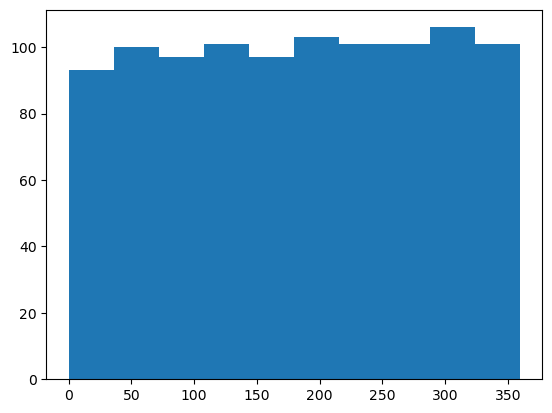

In [41]:
#8.8
data = list(sample_iter(X, numsamples=1000))
plt.hist(data)

(array([ 95.,  95., 112.,  99., 101., 108., 107., 101.,  92.,  90.]),
 array([2.79755957e-01, 3.60391505e+01, 7.17985450e+01, 1.07557940e+02,
        1.43317334e+02, 1.79076729e+02, 2.14836123e+02, 2.50595518e+02,
        2.86354912e+02, 3.22114307e+02, 3.57873701e+02]),
 <BarContainer object of 10 artists>)

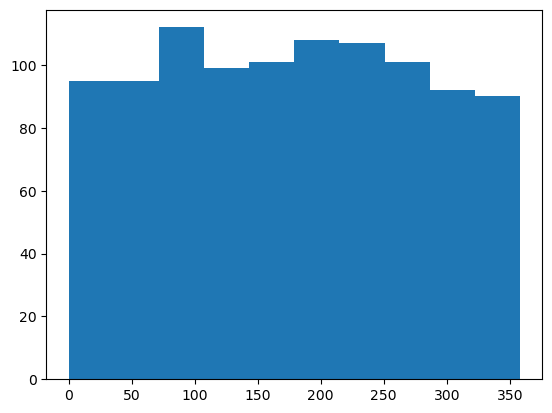

In [42]:
data = rv.rvs(1000)
plt.hist(data)

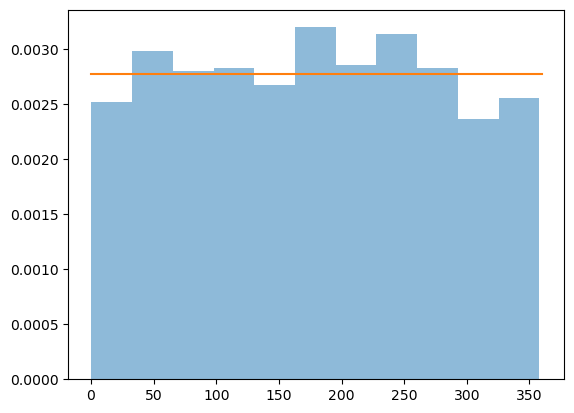

In [48]:
x = np.linspace(0, 360, 100); y = [density(X)(x) for x in x]
_, ax = plt.subplots()
ax.hist(data, bins='sturges', density=True, alpha=0.5)
ax.plot(x,y);

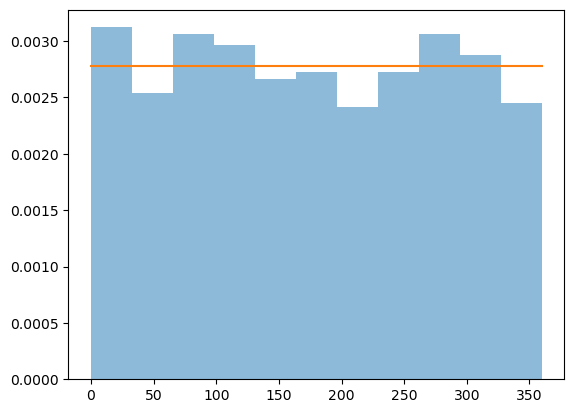

In [49]:
data = rv.rvs(1000)
x = np.linspace(0, 360, 100); y = rv.pdf(x)
_, ax = plt.subplots()
ax.hist(data, bins='sturges', density=True, alpha=0.5)
ax.plot(x,y)

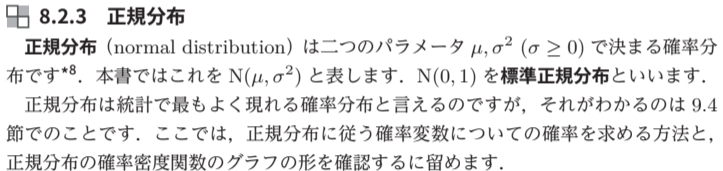

In [55]:
#8.9
X = Normal('X', 6, 2)
N((cdf(X)(6+3*2) - cdf(X)(6-3*2)))

0.997300203936740

In [56]:
rv = stats.norm(6, 2)
rv.cdf(6+3*2) - rv.cdf(6-3*2)

0.9973002039367398

In [57]:
N(P(And(6-3*2 <= X, X <= 6+3*2)))

0.997300203936740

In [58]:
var('x')
N(integrate(density(X)(x), (x, 6-3*2, 6+3*2)))

0.997300203936740

In [59]:
quad(rv.pdf, 6-3*2, 6+3*2)

(0.9973002039367399, 1.1072256503105314e-14)

In [60]:
var('mu sigma x'); X = Normal('X', mu, sigma)
a, b = mu - 3 * sigma, mu + 3 * sigma
(N((cdf(X)(b)-cdf(X)(a))),
N(integrate(density(X)(x),(x,a, b))))# 方法3

(0.997300203936740, 0.997300203936740)

In [62]:
#8.10
var('mu sigma x')
X = Normal('X', mu, sigma)
density(X)(x)

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

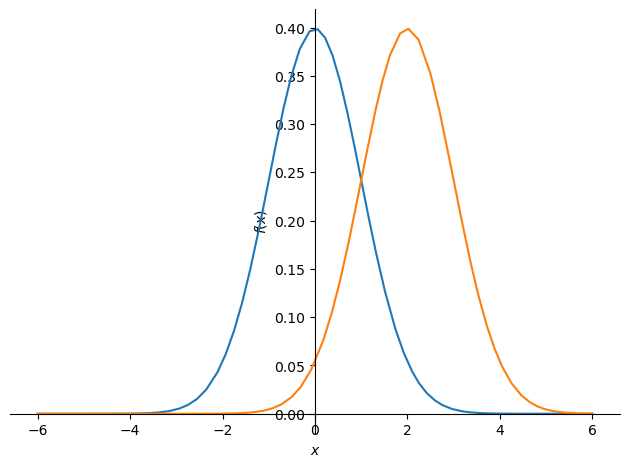

In [63]:
X1=Normal('X1',0,1); X2=Normal('X2',2,1);var('x')
plot(density(X1)(x),density(X2)(x),(x,-6,6));

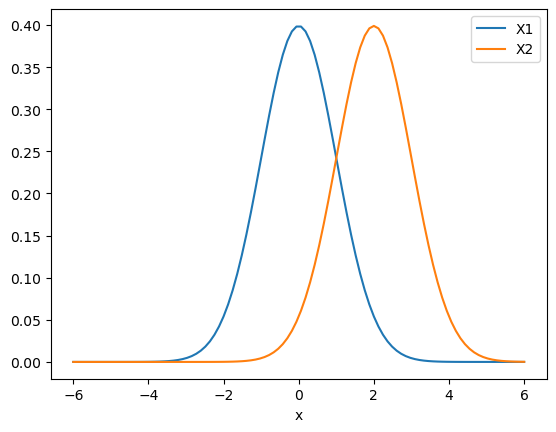

In [64]:
rv1 = stats.norm(0, 1); rv2= stats.norm(2, 1); x= np.linspace(-6, 6, 100)
pd.DataFrame({'x': x,'X1': rv1.pdf(x),'X2':rv2.pdf(x)}).plot(x='x');

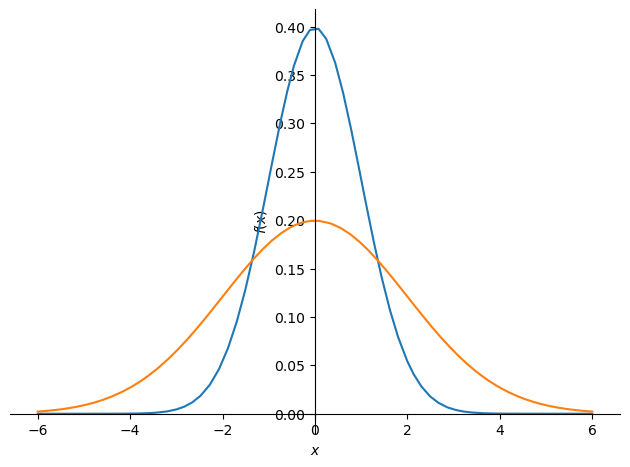

In [65]:
X3=Normal('X3',0,2); var('x')
plot(density(X1)(x),density(X3)(x),(x,-6,6));

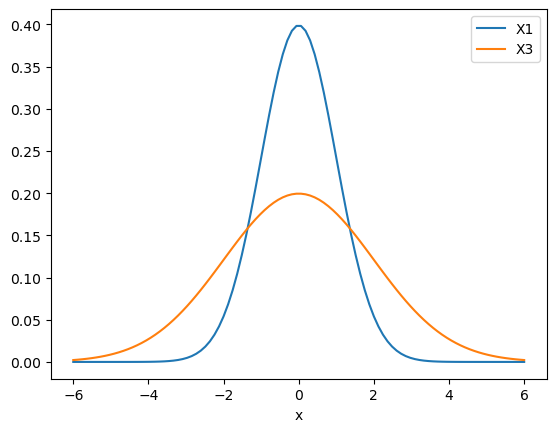

In [66]:
rv3 = stats.norm(0, 2); x = np.linspace(-6, 6, 100)
pd. DataFrame({'x': x,'X1': rv1.pdf(x),'X3': rv3.pdf(x)}).plot(x='x');

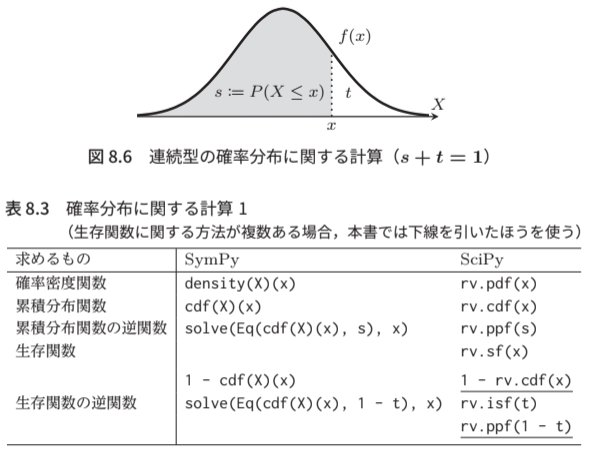